<a href="https://colab.research.google.com/github/AAYAN-HUB/Datasets/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1 - ELI5

_“If you can't explain it simply, you don't understand it well enough.” – Albert Einstein_

Explaining technical concepts to a non-technical audience is an underappreciated skill; one which the GMMA/MMA program aims to give its students; and one that will truly set you apart in the job market. The only way to gain a skill is by practice, so here we go.

Answer each question below as though you were talking to a 5 year old (equivalently: a grandma, or a completely non-technical manager, or an Ivey grad). Use your own words. Use analogies where possible. Examples are better than theory. Keep it short, but be complete. Use simple, plain English. Do not use business buzzwords like _actualize, empower, fungible, leverage, or synergize_. Do not use technical buzzwords that most people don’t know like _model, agile, bandwidth, IoT, blockchain, AR, VR, actionable insights_. Inform the audience without going into too much technical detail, and without embarrassing yourself or Uncle Steve. Your goal is to truly help them understand, not to give what you feel is a “technically precise” answer and move on (but they still don’t understand!). Don’t be that guy!

Please keep each answer to 1000 characters or less.

Finally, feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer.


### Part 1: What is “Big Data” and how is it different than “regular data”?

The term big data refers to the size and the use of the large amounts of data in a data-set. By large we refer to the size range of approximately about petabytes to exabytes. Since the data is on a massive scale, it becomes incredibly difficult to store, handle and process. To recognize data as big, we usually test it's quantity being generated, the speed at which the data is being gerenrated and different types of data that exist.

The key difference between the big data and traditional data is how the data is being stored and handled as well as the different tools used to process them. Organizations use different strategies for both big and traditional data to optimize different business objectives based on their goals.

### Part 2: What is Hadoop? Hint: What problems in previous data storage and processing was Hadoop designed to solve? How did Hadoop accomplish that?

Before the rise of the big data, Organizations all over the world use to handle and store their data in a centralized place called Enterprise Data Warehouse (EDW). However, as time passed by the size of the data stored in those EDW's became difficult to manage as EDW's required more storage and maintenance. 

Therefore, a new computing framwork was developed in 2006 called Hadoop, whose main aim was to handle the increasing demand of data size and storage and computational job.

Hadoop handled its mission quite successfully as it broke down the large data jobs into small units and then allocate them to the machines to perform a task. An example of this can be allocating the task of sorting and counting large quantities of colorful candies to  different groups than one person.  

### Part 3: How does Big Data and the cloud help Machine Learning? 

Machine learning (ML) usually involves building models from the data. If the data set is large, the ML algorithm will learn and identify a better trend from the data and therefore, will predict better results. Since big data tends to be large it will aid ML in building more effective and efficient models with a better predictive power. 

The concept of cloud was introduced to rent the compuatational power and storage capacity to the organizations to conduct and store all the work on cloud server. This helped the ML process in providing the computational power to process the complex data with a sophisticated infrastructure and data security. An example of such a platform could be Databricks and Amazon AWS

### Part 4: What is NoSQL?

Many databases can be descrbied as relational and non relational. The key difference between these databases is how they store the information. The non-relational database stores the data in a non-tabular, document form meaning, the data can store different details in different format than a structured format. 
NoSQL is the name given to these non-relational databases and they tend to be highly flexible in terms of the data they store. E.g A database of customers having their own document that stores all the different types of information about them in one document.

### Part 5: Name three ways topic modeling could help a bank.

Banks have a strict and dyanmic regulatory requirements which means they are expected to be updated and aware of different laws. Topic modelling can help banks in a number of ways, such as :

1- Possibility of reducing the burden of regulations by automating the process of identifying regulations from the text.

2- Enahance the customer service by analyzing the sentiments from a chatbot

3- Can evaluate the effectiveness of Bank's PR campaigns

### Part 6: What is Apache Spark, exactly, and what are its pros and cons?

Apache Spark is a fast and general-purpose compute framework for large-scale data processing framwork. Apache Spark tends to work on top of Hadoop, however it doesnot use the MapReduce's compute engine instead, it has it's own compute engine called Spark Core. Since it has its own computational capability, it gives Apache Spark these advantages:

- Incredibly fast speed to process data
- Easy to use along with its compatibility with Hadoop
- built in memory , allowing it to store data efficiently

However, it has some disadvantages too :
- Manual codes may be required at times as it lacks automation process
-It has limitations when it comes to the algorithms it can process. 
- There is no support for real time processing 
-There is no dedicated file managment system 

# Question 2: Sentiment Analysis via the ML-based approach

Download the “Product Sentiment” dataset from the course portal: sentiment_train.csv and sentiment_test.csv.

### Part 1.a. Loading and Prep

Load, clean, and preprocess the data as you find necessary.

In [ ]:
## IMPORTING REQUIRED PACKAGES
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
##READING THE TRAIN DATA
df = pd.read_csv("sentiment_train.csv")

print(df.info())
print(df.head())
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  2400 non-null   object
 1   Polarity  2400 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 37.6+ KB
None
                                            Sentence  Polarity
0                           Wow... Loved this place.         1
1                                 Crust is not good.         0
2          Not tasty and the texture was just nasty.         0
3  Stopped by during the late May bank holiday of...         1
4  The selection on the menu was great and so wer...         1


(2400, 2)

In [ ]:
##DATA PROCESSING AND MODELING
def run_svm(df):
    
    X = df['Sentence']
    y = df['Polarity']

    tfidf = TfidfVectorizer()
    X = tfidf.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = 0.2, random_state = 0)

    # X_train = train_index['twitts']
    # X_test = test_index['twitts']
    # y_train = train_index['sentiment']
    # y_test = test_index['sentiment']
 
    print('shape of X: ', X.shape)
    print('shape of y: ', y.shape)

    clf = LinearSVC()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print()
    print('Printing Report')
    print(classification_report(y_test, y_pred))
    predictions = pd.DataFrame(y_pred)

    return tfidf, clf

### Part 1.b. Modeling

Use your favorite ML algorithm to train a classification model.  Don’t forget everything that we’ve learned in our ML course: hyperparameter tuning, cross validation, handling imbalanced data, etc. Make reasonable decisions and try to create the best-performing classifier that you can.

In [ ]:
tfidf, clf = run_svm(df)

shape of X:  (2400, 4000)
shape of y:  (2400,)

Printing Report
              precision    recall  f1-score   support

           0       0.72      0.86      0.79       260
           1       0.79      0.61      0.69       220

    accuracy                           0.75       480
   macro avg       0.76      0.74      0.74       480
weighted avg       0.75      0.75      0.74       480



In [ ]:
## READING IN TEST DATA
X = df['Sentence']
y = df['Polarity']

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = 0.2, random_state = 0)

y_pred = clf.predict(X_test)

predictions = pd.DataFrame(y_pred)


In [ ]:
df_test = pd.read_csv("sentiment_test.csv")

print(df_test.info())
print(df_test.head())
df_test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  600 non-null    object
 1   Polarity  600 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ KB
None
                                            Sentence  Polarity
0  A good commentary of today's love and undoubte...         1
1  For people who are first timers in film making...         1
2  It was very popular when I was in the cinema, ...         1
3  It's a feel-good film and that's how I felt wh...         1
4  It has northern humour and positive about the ...         1


(600, 2)

In [ ]:
tfidf, clf = run_svm(df_test)

shape of X:  (600, 2349)
shape of y:  (600,)

Printing Report
              precision    recall  f1-score   support

           0       0.71      0.82      0.76        50
           1       0.85      0.76      0.80        70

    accuracy                           0.78       120
   macro avg       0.78      0.79      0.78       120
weighted avg       0.79      0.78      0.78       120



In [ ]:
## OUR PREDICTIONS
X = df_test['Sentence']
y = df_test['Polarity']

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size = 0.2, random_state = 0)

y_pred = clf.predict(X_test)

predictions = pd.DataFrame(y_pred)


### Part 2. Given the accuracy and F1-score of your model, are you satisfied with the results, from a business point of view? Explain.

Sentiment Analysis is a great tool to derive customer's satisfaction levels when they will use our products. If the sentiments sound positive it means the customers like our products and are satisfied with the utility.

In the model above, our F1 score tends to be 78% which implies that our model is able to predict the sentiments of our customers as close to 78% which will help us in determining what products are the customers satsified with and what makes them unhappy.

However, we will also want to improve our score because the better the model prediction (close to the real sentiments) the better insights can be derived from the customer's reviews hence, allowing us an opportunity to improve our products and customer retention.

Moreover, the recall score is 82% for our model. This tells us how effective the model is in predicting the negative reviews

### Part 3. Show five example instances in which your model’s predictions were incorrect. Describe why you think the model was wrong. Don’t just guess: dig deep to figure out the root cause.

In [ ]:
wrong_predictions = pd.concat([df_test, predictions], axis=1, join="inner")

In [ ]:
wrong_predictions.head()

,Sentence,Polarity,0
0,A good commentary of today's love and undoubte...,1,0
1,For people who are first timers in film making...,1,0
2,"It was very popular when I was in the cinema, ...",1,0
3,It's a feel-good film and that's how I felt wh...,1,0
4,It has northern humour and positive about the ...,1,0


In [ ]:
wrong_predictions.to_csv('wrong_predictions.csv')

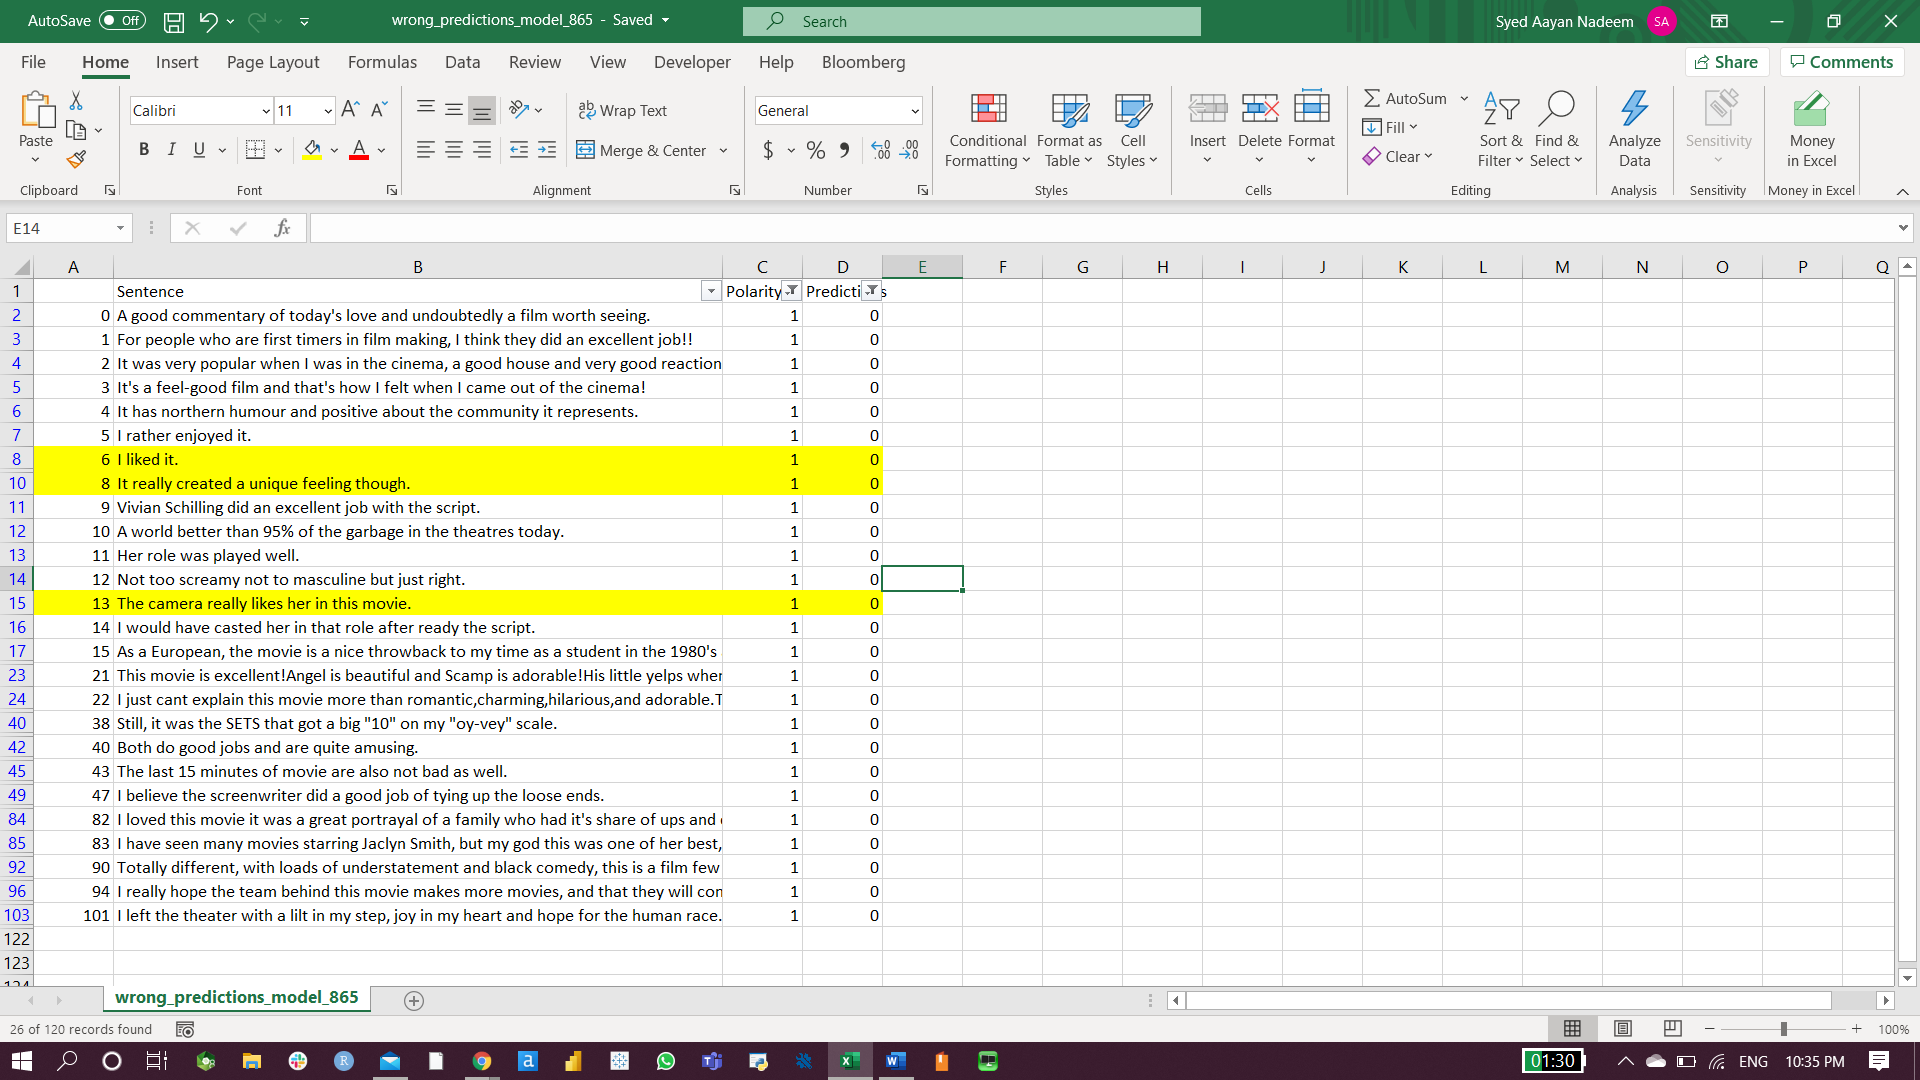

The above file contains our predictions against the actual result.

We can see that our model failed to predict the sentiments correctly on a number of occassions:

Row 8 - The model couldn't predict the right sentiment because the word *it* was being used. Here we believe, the model failed to understand the word *it* which is an artice in the english language. 

Row 10 - The model couldn't predict the right sentiment because the word *though* was being used.

Row 15 - According to our experience with the developed model, our model failed to identify adverbs and hence made the worng prediction.


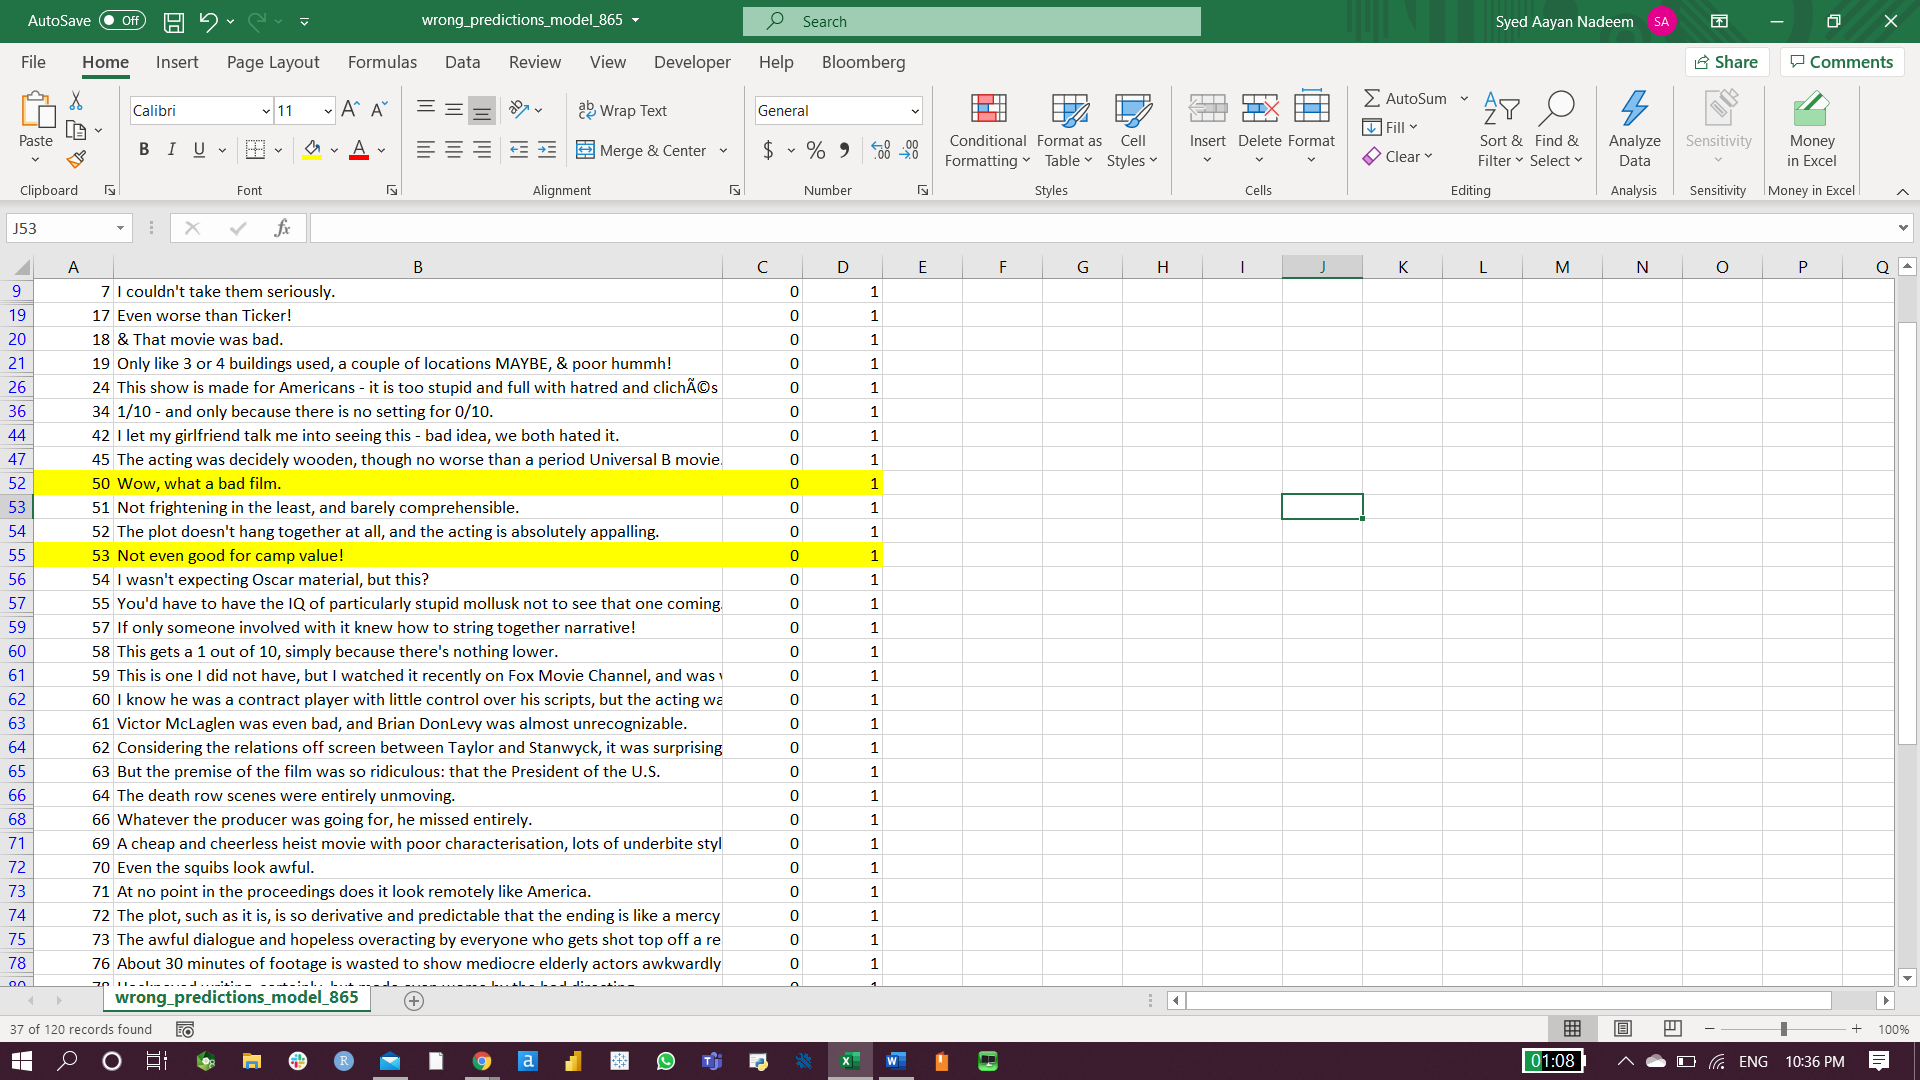

Row 52 - The 'WoW' which itself is a positive sentiment is used with as a sarcasm and the model failed to predict it, as we believe sarcams will require a better and fine tuning of hyperparameters which we didn't include in our model

Row 55 - Another instance where the model confused the word *good* in an argument. 

To conclude we believe that our model failed to identify adverbs, articles and confused itself with positive sentiments in a sarcasm on a number of occassions/instances and it's most likely due to the hyperparameters and feature engineering which lacked in our model.